In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from google.colab import files 
uploaded =files.upload()


Saving AMZN-DUK-KO.csv to AMZN-DUK-KO.csv


In [49]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AMZN-DUK-KO.csv']))


In [53]:
print(data.head(2))
print("The shape of sample data = ", data.shape)

         Date       AMZN        DUK         KO
0  03-01-2007  38.700001  34.971017  17.874906
1  04-01-2007  38.900002  35.044103  17.882263
The shape of sample data =  (2519, 4)


In [104]:
Date = data['Date']
# Droping data parameter
f_data = data.drop("Date",axis=1)
print(f_data.shape)

(2519, 3)


In [58]:
# standrizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(f_data)
print(standardized_data.shape)

(2519, 3)


In [61]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print(covar_matrix)
print ( "The shape of variance matrix = ", covar_matrix.shape)


[[2519.         2246.31437956 2230.59116943]
 [2246.31437956 2519.         2456.56065177]
 [2230.59116943 2456.56065177 2519.        ]]
The shape of variance matrix =  (3, 3)


In [65]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (1 and 2) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(1,2))
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (3, 2)
Updated shape of eigen vectors =  (2, 3)


In [110]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 3) X (3, 2519)  =  (2, 2519)


In [116]:
import pandas as pd
new_coordinates = np.vstack(new_coordinates).T
# creating a new data frame for ploting 
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st", "2nd"))
print(dataframe.head())

        1st       2nd
0  0.056178  2.024540
1  0.054887  2.020753
2  0.078214  2.060750
3  0.067575  2.053261
4  0.071927  2.057544


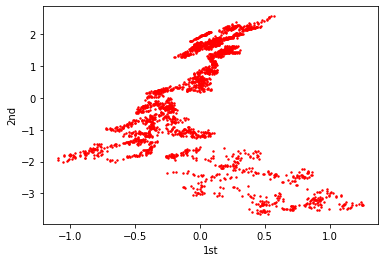

In [118]:
import matplotlib.pyplot as plt
ax1 = dataframe.plot.scatter(x='1st',y='2nd',s=2,c='red')
plt.show()